In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt

In [93]:
df = pd.read_csv("../data/daily_values/ifcb104-daily-mean.csv")
df["dateTime"] = pd.to_datetime(df['dateTime'])
df.index = df["dateTime"]
df = df.drop(columns='dateTime')
df.head()

Akashiwo  Alexandrium_singlet  Amy_Gony_Protoc  Asterionellopsis  \
dateTime                                                                       
2015-08-21  0.000000                  0.0              0.0               0.0   
2015-08-22       NaN                  NaN              NaN               NaN   
2015-08-23       NaN                  NaN              NaN               NaN   
2015-08-24  0.439332                  0.0              0.0               0.0   
2015-08-25       NaN                  NaN              NaN               NaN   

             Centric  Ceratium  Chaetoceros  Cochlodinium  \
dateTime                                                    
2015-08-21  0.000000       0.0     0.000000           0.0   
2015-08-22       NaN       NaN          NaN           NaN   
2015-08-23       NaN       NaN          NaN           NaN   
2015-08-24  2.837544       0.0     3.713623           0.0   
2015-08-25       NaN       NaN          NaN           NaN   

            Cryptophyte,NanoP_less10,small_misc  Cyl_Nitz  ...  \
dateTime                                                   ...   
2015-08-21                         14451.952012       0.0  ...   
2015-08-22                                  NaN       NaN  ...   
2015-08-23                                  NaN       NaN  ...   
2015-08-24                          4173.093010       0.0  ...   
2015-08-25                                  NaN       NaN  ...   

            Gymnodinium,Peridinium  Lingulodinium  Pennate  Prorocentrum  \
dateTime                                                                   
2015-08-21                     0.0            0.0      0.0           0.0   
2015-08-22                     NaN            NaN      NaN           NaN   
2015-08-23                     NaN            NaN      NaN           NaN   
2015-08-24                     0.0            0.0      0.0           0.0   
2015-08-25                     NaN            NaN      NaN           NaN   

            Pseudo-nitzschia  Scrip_Het  Skeletonema  Thalassionema  \
dateTime                                                              
2015-08-21               0.0   0.000000          0.0            0.0   
2015-08-22               NaN        NaN          NaN            NaN   
2015-08-23               NaN        NaN          NaN            NaN   
2015-08-24               0.0  10.211024          0.0            0.0   
2015-08-25               NaN        NaN          NaN            NaN   

            Thalassiosira  unclassified  
dateTime                                 
2015-08-21       3.466527      6.933054  
2015-08-22            NaN           NaN  
2015-08-23            NaN           NaN  
2015-08-24       6.202549     20.202954  
2015-08-25            NaN           NaN  

[5 rows x 25 columns]

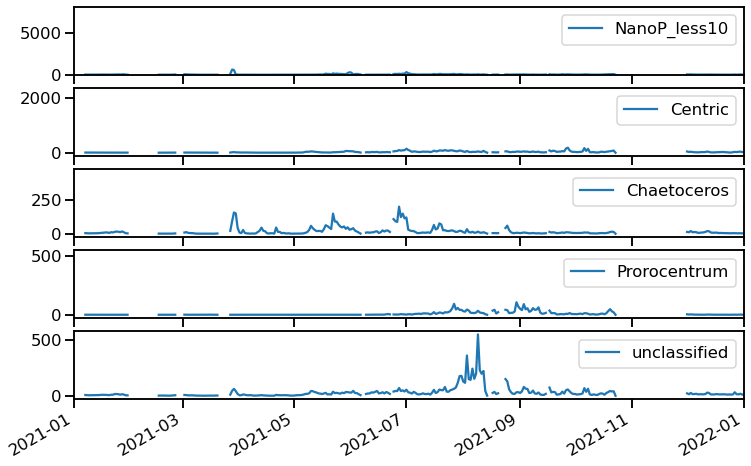

In [94]:
sns.set_context("talk")
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,sharex=True)
fig.set_size_inches(12,8)
ax1.plot(df["Cryptophyte,NanoP_less10,small_misc"],label="NanoP_less10")
ax1.set_ylim(0,8000)
ax1.legend()
ax2.plot(df["Centric"],label="Centric")
ax2.legend()
ax3.plot(df["Chaetoceros"],label="Chaetoceros")
ax3.legend()
ax4.plot(df["Prorocentrum"],label="Prorocentrum")
ax4.legend()
ax5.plot(df["unclassified"],label="unclassified")
ax5.legend()
ax1.set_xlim(dt.datetime(2021,1,1),dt.datetime(2022,1,1))
fig.autofmt_xdate()

In [95]:
df.sum(axis=0).sort_values(ascending=False)

Cryptophyte,NanoP_less10,small_misc    143093.017582
Centric                                 53407.843801
unclassified                            30443.142295
Chaetoceros                             23939.020138
Prorocentrum                            16498.247327
Gymnodinium,Peridinium                  14519.880589
Akashiwo                                12703.914831
Pennate                                 12678.542198
Scrip_Het                                9409.958107
Thalassiosira                            7503.526688
Cochlodinium                             6316.694490
Det_Cer_Lau                              3242.444306
Asterionellopsis                         3079.204785
Ceratium                                 2939.467454
Dinophysis                               2748.784670
Cyl_Nitz                                 2017.206436
Dictyocha                                1662.820577
Eucampia                                 1548.547500
Alexandrium_singlet                       947.

Text(0.5, 1.0, 'IFCB104 - Daily Average (Mean)')

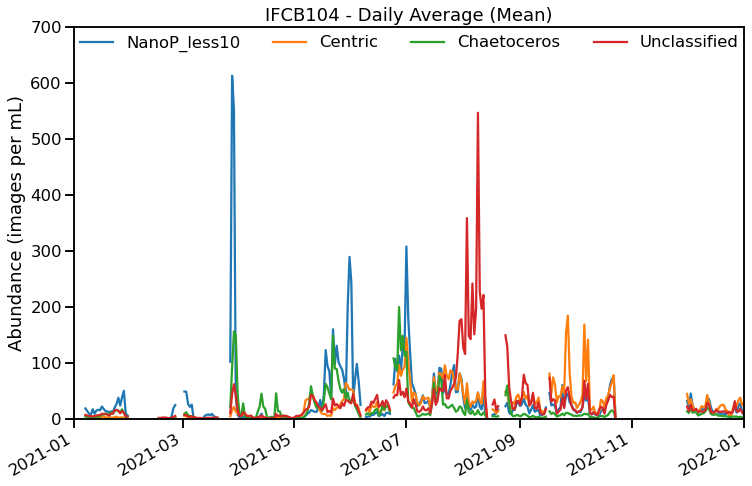

In [96]:
sns.set_context("talk")
fig, ax1 = plt.subplots(1,sharex=True)
fig.set_size_inches(12,8)
ax1.plot(df["Cryptophyte,NanoP_less10,small_misc"],label="NanoP_less10")
ax1.plot(df["Centric"],label="Centric")
ax1.plot(df["Chaetoceros"],label="Chaetoceros")
ax1.plot(df["unclassified"],label="Unclassified")

ax1.set_ylim(0,700)
ax1.set_xlim(dt.datetime(2021,1,1),dt.datetime(2022,1,1))
ax1.set_ylabel("Abundance (images per mL)")
fig.autofmt_xdate()
ax1.legend(
    loc="lower center", # "upper center" puts it below the line
    ncol=5,
    bbox_to_anchor=(0.5, .9),
    frameon=False
);
plt.title("IFCB104 - Daily Average (Mean)")

In [97]:
stime = dt.datetime(2021,1,1)
etime = dt.datetime(2022,1,1)
df.query("dateTime > @stime & dateTime < @etime").sum(axis=0).sort_values(ascending=False)

Cryptophyte,NanoP_less10,small_misc    9644.509034
unclassified                           8785.454175
Centric                                7680.808079
Gymnodinium,Peridinium                 5857.857958
Chaetoceros                            5060.885561
Cochlodinium                           4625.904013
Akashiwo                               2856.859727
Prorocentrum                           2457.822960
Pennate                                2275.039032
Scrip_Het                              1433.580366
Ceratium                               1333.281688
Thalassiosira                          1327.150098
Dinophysis                              844.413456
Alexandrium_singlet                     495.547861
Det_Cer_Lau                             461.223965
Dictyocha                               453.558813
Asterionellopsis                        228.592003
Lingulodinium                           180.482024
Eucampia                                151.608334
Amy_Gony_Protoc                